In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_testing_metrics(filename):
    """Load testing metrics from testing_metrics.txt format
    Returns: mean_chi2, median_chi2, frac_gt_0p2, frac_gt_1
    """
    try:
        filepath = f'hyperparameter_results/testing_metrics/{filename}'
        with open(filepath, 'r') as f:
            lines = f.readlines()
        
        # Parse the 4 rows
        mean_chi2 = np.array([float(x) for x in lines[0].strip().split()])
        median_chi2 = np.array([float(x) for x in lines[1].strip().split()])
        frac_gt_0p2 = np.array([float(x) for x in lines[2].strip().split()])
        frac_gt_1 = np.array([float(x) for x in lines[3].strip().split()])
        
        return mean_chi2, median_chi2, frac_gt_0p2, frac_gt_1
    except FileNotFoundError:
        print(f"File {filepath} not found")
        return None, None, None, None

In [31]:
# # Weight Decay Sweep
# experiments = [
#     ('testing_metrics_wd_0.txt', 'Weight Decay 0', 'red'),
#     ('testing_metrics_wd_1e2.txt', 'Weight Decay 1e-2', 'orange'),
#     ('testing_metrics_wd_1e3.txt', 'Weight Decay 1e-3', 'green'),
#     ('testing_metrics_wd_1e4.txt', 'Weight Decay 1e-4', 'blue'),
#     ('testing_metrics_wd_1e5.txt', 'Weight Decay 1e-5', 'purple')
# ]

# # Learning Rate Sweep
# experiments = [
#     ('testing_metrics_lr_1e2.txt', 'Learning Rate 1e-2', 'red'),
#     ('testing_metrics_lr_5e3.txt', 'Learning Rate 5e-3', 'orange'),
#     ('testing_metrics_lr_1e3.txt', 'Learning Rate 1e-3', 'green'),
#     ('testing_metrics_lr_5e4.txt', 'Learning Rate 5e-4', 'blue'),
#     ('testing_metrics_lr_1e4.txt', 'Learning Rate 1e-4', 'purple'),
#     ('testing_metrics_lr_1e5.txt', 'Learning Rate 1e-5', 'pink')
# ]

# # Batch Size Validation
# experiments = [
#     ('testing_metrics_bs_32.txt', 'Batch Size 32', 'red'),
#     ('testing_metrics_bs_256.txt', 'Batch Size 256', 'blue')
# ]

# # Mixed Hyperparameters - Weight Decay 0
# experiments = [
#     ('testing_metrics_wd0_lr1e3.txt', 'WD=0, LR=1e-3', 'red'),
#     ('testing_metrics_wd0_lr5e4.txt', 'WD=0, LR=5e-4', 'orange'),
#     ('testing_metrics_wd0_lr1e4.txt', 'WD=0, LR=1e-4', 'blue')
# ]

# Mixed Hyperparameters - Weight Decay 1e-5
experiments = [
    ('testing_metrics_wd1e5_lr1e3.txt', 'WD=1e-5, LR=1e-3', 'red'),
    ('testing_metrics_wd1e5_lr5e4.txt', 'WD=1e-5, LR=5e-4', 'orange'),
    ('testing_metrics_wd1e5_lr1e4.txt', 'WD=1e-5, LR=1e-4', 'blue')
]

# # Mixed Hyperparameters - Weight Decay 1e-4
# experiments = [
#     ('testing_metrics_wd1e4_lr1e3.txt', 'WD=1e-4, LR=1e-3', 'red'),
#     ('testing_metrics_wd1e4_lr5e4.txt', 'WD=1e-4, LR=5e-4', 'orange')
# ]

# # High Accuracy Tests
# experiments = [
#     ('testing_metrics_high_accuracy_baseline.txt', 'High Accuracy Baseline', 'blue'),
#     ('testing_metrics_high_accuracy_wd1e5_lr5e4.txt', 'High Acc: WD=1e-5, LR=5e-4', 'red'),
#     ('testing_metrics_high_accuracy_wd0_lr1e3.txt', 'High Acc: WD=0, LR=1e-3', 'green')
# ]

# Load data
metrics_data = {}
for filename, label, color in experiments:
    mean_chi2, median_chi2, frac_gt_0p2, frac_gt_1 = load_testing_metrics(filename)
    if mean_chi2 is not None:
        metrics_data[label] = {
            'mean_chi2': mean_chi2,
            'median_chi2': median_chi2, 
            'frac_gt_0p2': frac_gt_0p2,
            'frac_gt_1': frac_gt_1,
            'color': color
            }
        print(f"Loaded {label}: {len(mean_chi2)} epochs")
    else:
        print(f"Could not load {label}")

Loaded WD=1e-5, LR=1e-3: 500 epochs
Loaded WD=1e-5, LR=5e-4: 500 epochs
Loaded WD=1e-5, LR=1e-4: 500 epochs


/tmp/ipykernel_3608864/281372605.py:44: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax3.set_ylim(0, 1.05)
/tmp/ipykernel_3608864/281372605.py:54: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax4.set_ylim(0, 1.05)


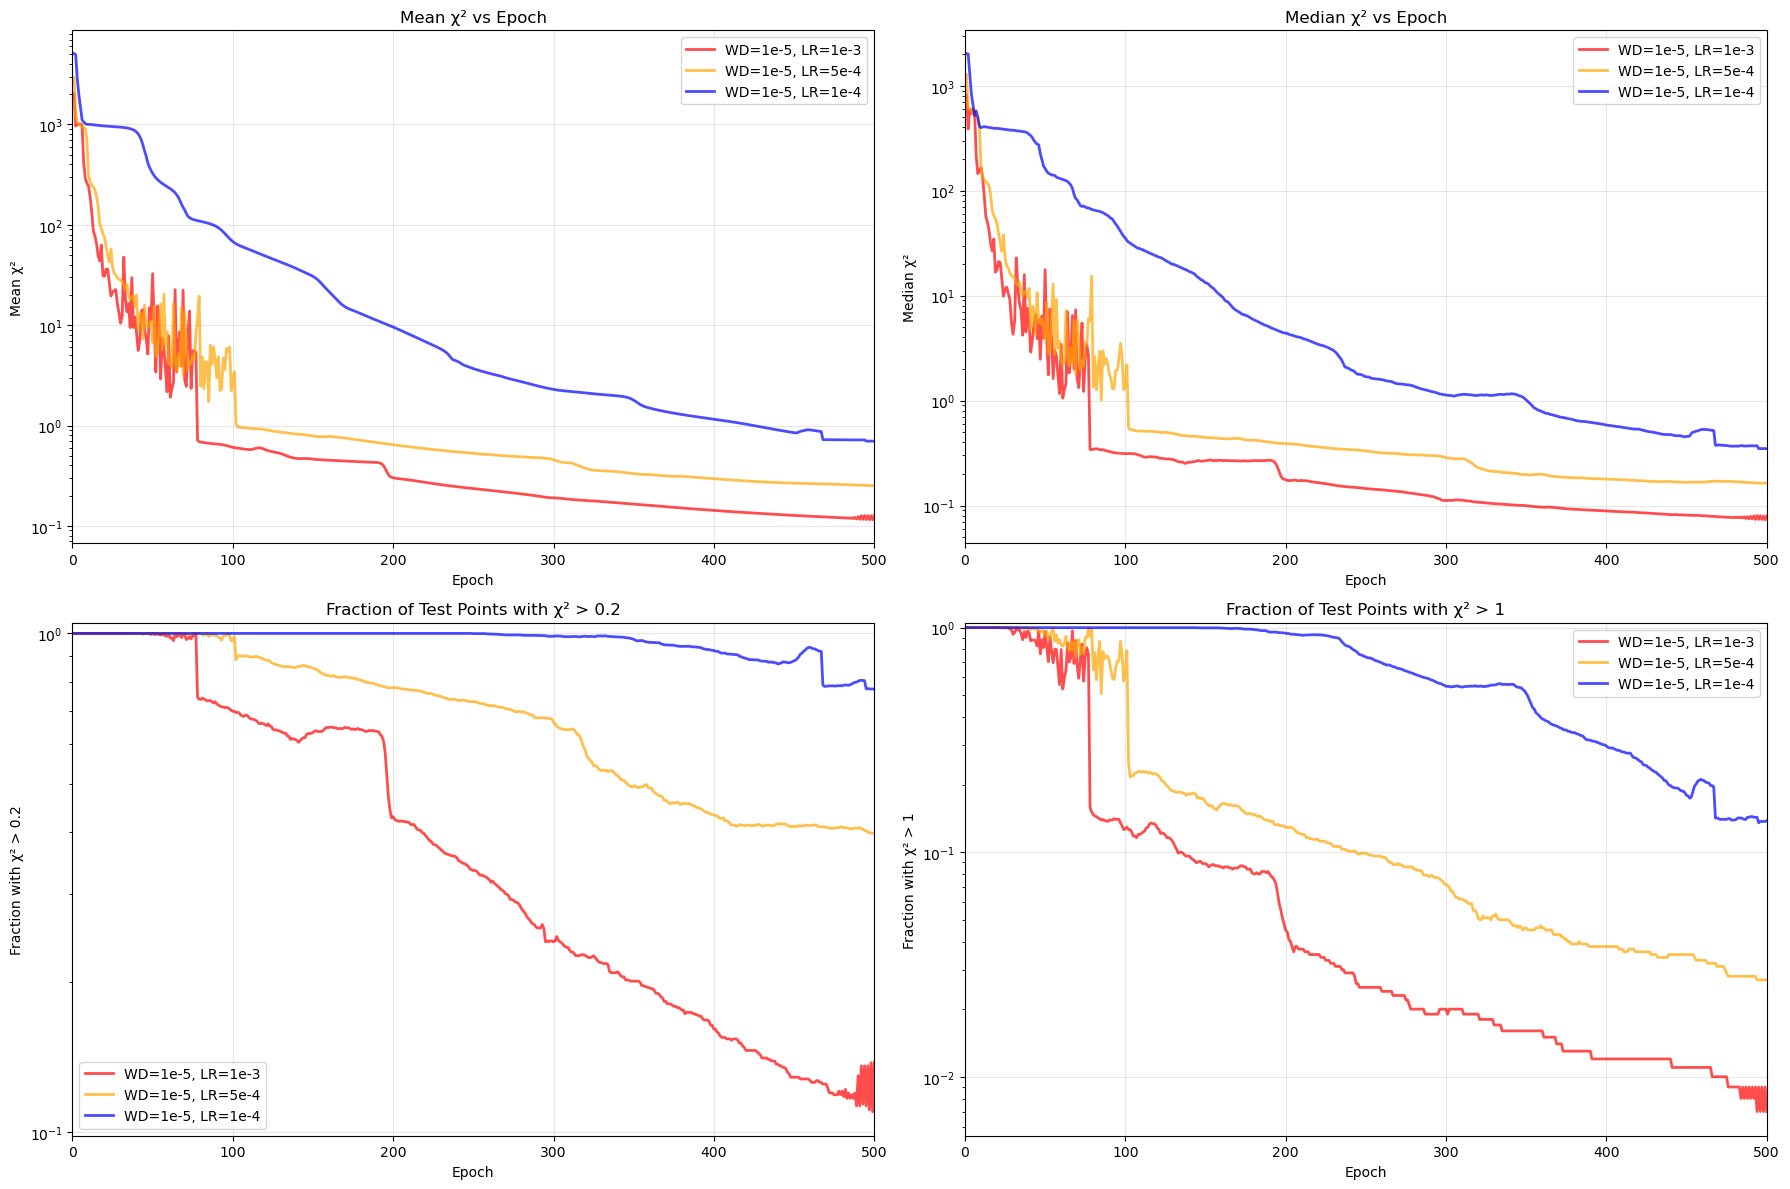

In [32]:
# Create comparison plots with 4 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Plot all experiments
for label, data in metrics_data.items():
    epochs = range(1, len(data['mean_chi2']) + 1)
    
    # Mean chi2
    ax1.plot(epochs, data['mean_chi2'], color=data['color'], label=label, linewidth=2, alpha=0.7)
    
    # Median chi2
    ax2.plot(epochs, data['median_chi2'], color=data['color'], label=label, linewidth=2, alpha=0.7)
    
    # Fraction chi2 > 0.2
    ax3.plot(epochs, data['frac_gt_0p2'], color=data['color'], label=label, linewidth=2, alpha=0.7)
    
    # Fraction chi2 > 1
    ax4.plot(epochs, data['frac_gt_1'], color=data['color'], label=label, linewidth=2, alpha=0.7)

# Format mean chi2 plot
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean χ²')
ax1.set_title('Mean χ² vs Epoch')
ax1.set_yscale('log')
ax1.set_xlim(0, 500)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Format median chi2 plot
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Median χ²')
ax2.set_title('Median χ² vs Epoch')
ax2.set_yscale('log')
ax2.set_xlim(0, 500)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Format fraction > 0.2 plot
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Fraction with χ² > 0.2')
ax3.set_title('Fraction of Test Points with χ² > 0.2')
ax3.set_yscale('log')
ax3.set_xlim(0, 500)
ax3.set_ylim(0, 1.05)
ax3.grid(True, alpha=0.3)
ax3.legend()

# Format fraction > 1 plot
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Fraction with χ² > 1')
ax4.set_title('Fraction of Test Points with χ² > 1')
ax4.set_yscale('log')
ax4.set_xlim(0, 500)
ax4.set_ylim(0, 1.05)
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()